# Transfer Learningのお勉強

*20170621 Mitsuhiro Ito*

自分で書いてみよう！  
目標　高精度な犬猫を分類するモデルの構築

* [keras公式ブログ](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
* [keras公式ドキュメント](https://keras.io/applications)
* [@aidiaryさんの記事](http://aidiary.hatenablog.com/entry/20170110/1484057655)

---

# 1. 前準備

In [1]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/Users/mitsuhiro/Work/intro_machine_learning')
from utils import save_model_viz, save_weights, save_hist, plot_hist
from utils import load_mnist_3D

# 2. 画像ファイルの入手


犬猫データはKaggleからゲットしました  
登録がめんどくさいです  
https://www.kaggle.com/c/dogs-vs-cats/data


次に画像ファイルをtrain用1000枚、validation用400枚に分けます

In [68]:
import os

In [87]:
source_dir = "/Users/mitsuhiro/Work/train"　#画像ファイルへのpath

In [89]:
os.makedirs("%s/data" % "/Users/mitsuhiro/Work")　#train、valid用のフォルダを順次作成
data_dir = "/Users/mitsuhiro/Work/data"

In [90]:
os.makedirs("%s/train" % data_dir)
os.makedirs("%s/valid" % data_dir)
train_dir = "/Users/mitsuhiro/Work/data/train"
valid_dir = "/Users/mitsuhiro/Work/data/valid"

In [91]:
os.makedirs("%s/dogs" % train_dir)
os.makedirs("%s/cats" % train_dir)
os.makedirs("%s/dogs" % valid_dir)
os.makedirs("%s/cats" % valid_dir)

In [92]:
for i in range(1000):　#train用画像ファイルを移動
    os.rename("%s/dog.%d.jpg" % (source_dir, i + 1),
              "%s/dogs/dog%04d.jpg" % (train_dir, i + 1))
    os.rename("%s/cat.%d.jpg" % (source_dir, i + 1),
              "%s/cats/cat%04d.jpg" % (train_dir, i + 1))

In [93]:
ls "/Users/mitsuhiro/Work/data/train/cats"

cat0001.jpg  cat0168.jpg  cat0335.jpg  cat0502.jpg  cat0669.jpg  cat0836.jpg
cat0002.jpg  cat0169.jpg  cat0336.jpg  cat0503.jpg  cat0670.jpg  cat0837.jpg
cat0003.jpg  cat0170.jpg  cat0337.jpg  cat0504.jpg  cat0671.jpg  cat0838.jpg
cat0004.jpg  cat0171.jpg  cat0338.jpg  cat0505.jpg  cat0672.jpg  cat0839.jpg
cat0005.jpg  cat0172.jpg  cat0339.jpg  cat0506.jpg  cat0673.jpg  cat0840.jpg
cat0006.jpg  cat0173.jpg  cat0340.jpg  cat0507.jpg  cat0674.jpg  cat0841.jpg
cat0007.jpg  cat0174.jpg  cat0341.jpg  cat0508.jpg  cat0675.jpg  cat0842.jpg
cat0008.jpg  cat0175.jpg  cat0342.jpg  cat0509.jpg  cat0676.jpg  cat0843.jpg
cat0009.jpg  cat0176.jpg  cat0343.jpg  cat0510.jpg  cat0677.jpg  cat0844.jpg
cat0010.jpg  cat0177.jpg  cat0344.jpg  cat0511.jpg  cat0678.jpg  cat0845.jpg
cat0011.jpg  cat0178.jpg  cat0345.jpg  cat0512.jpg  cat0679.jpg  cat0846.jpg
cat0012.jpg  cat0179.jpg  cat0346.jpg  cat0513.jpg  cat0680.jpg  cat0847.jpg
cat0013.jpg  cat0180.jpg  cat0347.jpg  cat0514.jpg  cat0681.jpg  cat0848.jpg

In [95]:
for i in range(400):#valid用画像ファイルを移動
    os.rename("%s/dog.%d.jpg" % (source_dir, 1000 + i + 1),
              "%s/dogs/dog%04d.jpg" % (valid_dir, i + 1))
    os.rename("%s/cat.%d.jpg" % (source_dir, 1000 + i + 1),
              "%s/cats/cat%04d.jpg" % (valid_dir, i + 1))


こんな感じになりました

    data/
        train/
              dogs/
                  dog.0001.jpg  ...  dog.1000.jpg
              cats/
                  cat.0001.jpg  ...  cat.1000.jp
                
        valid/
              dogs/
                  dog.0001.jpg  ...  dog.0400.jpg
              cats/
                　cat.0001.jpg  ...  cat.0400.jpg
                
---

# 3. 画像データへ加工

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [8]:
generator = ImageDataGenerator(rescale=1.0 / 255) 

ImageDataGeneratorによりリアルタイムに，画像データを生成する  
引数にはいろいろあるがrescaleなしで4-1.のCNNをやった場合、val_actが0.5付近から全然増えない...

ImageDataGenerator参考
https://keras.io/ja/preprocessing/image/


In [9]:
train_generator = generator.flow_from_directory('/Users/mitsuhiro/Work/data/train/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
valid_generator = generator.flow_from_directory('/Users/mitsuhiro/Work/data/valid/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


このgeneratorに渡せばデータ化してくれる

---




# 4.1 モデル構築＆評価　CNN

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
RUN_ID = 'CNN'
save_model_viz(RUN_ID, model)

In [10]:
batch_size = 16
hist = model.fit_generator(train_generator, 
                    steps_per_epoch = 2000 // batch_size, 
                    epochs=10, 
                    verbose=1, 
                    validation_data = valid_generator,
                    validation_steps= 800 // batch_size)

save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)

Epoch 1/10
125/125 [==============================] - 121s - loss: 0.6897 - acc: 0.5373 - val_loss: 0.6630 - val_acc: 0.5875
Epoch 2/10
125/125 [==============================] - 119s - loss: 0.6581 - acc: 0.5950 - val_loss: 0.6423 - val_acc: 0.6219
Epoch 3/10
125/125 [==============================] - 124s - loss: 0.6082 - acc: 0.6673 - val_loss: 0.5799 - val_acc: 0.6875
Epoch 4/10
125/125 [==============================] - 120s - loss: 0.4934 - acc: 0.7607 - val_loss: 0.6775 - val_acc: 0.6631
Epoch 5/10
125/125 [==============================] - 122s - loss: 0.3875 - acc: 0.8245 - val_loss: 0.6090 - val_acc: 0.7438
Epoch 6/10
125/125 [==============================] - 120s - loss: 0.2818 - acc: 0.8803 - val_loss: 0.6773 - val_acc: 0.7331
Epoch 7/10
125/125 [==============================] - 122s - loss: 0.1715 - acc: 0.9325 - val_loss: 0.8420 - val_acc: 0.7394
Epoch 8/10
125/125 [==============================] - 121s - loss: 0.1306 - acc: 0.9495 - val_loss: 0.9951 - val_acc: 0.7462


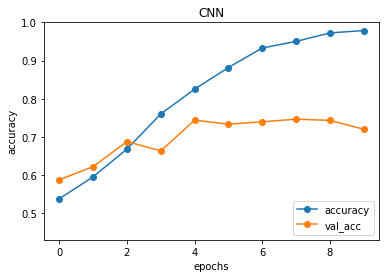

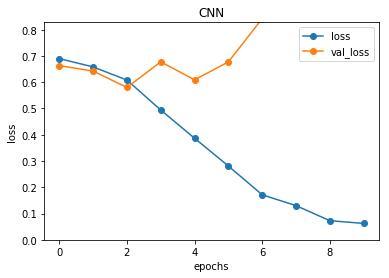

In [13]:
plot_hist(RUN_ID)

In [15]:
from IPython.display import Image
Image("model/mlp_vis.png")

---

# 4.2 モデル構築＆評価　VGG16を特長抽出機として使用

---

まずはVGG16を使って特徴量を抽出して保存

In [16]:
from keras.applications.vgg16 import VGG16

In [17]:
model = VGG16(include_top=False, weights='imagenet') # include_top=Fals :VGG16のFC部分を削除

In [21]:
bottleneck_features_train = model.predict_generator(train_generator, 2000)

KeyboardInterrupt: 

In [ ]:
np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)

In [23]:
bottleneck_features_train = model.predict_generator(valid_generator, 800, verbose = 1)

218/800 [=======>......................] - ETA: 5438s

KeyboardInterrupt: 

In [ ]:
np.save(open('bottleneck_features_valid.npy', 'w'), bottleneck_features_valid)

---

次に抽出した特徴量をinputとするFC層を作る

In [ ]:
train_data = np.load(open('bottleneck_features_train.npy'))
train_labels = np.array([0] * 1000 + [1] * 1000)

In [ ]:
valid_data = np.load(open('bottleneck_features_valid.npy'))
valid_labels = np.array([0] * 400 + [1] * 400)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
RUN_ID = 'FC'
save_model_viz(RUN_ID, model)

In [ ]:
batch_size = 16
hist = model.fit(train_data, train_labels,
          epochs=10,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))

save_weights(RUN_ID, model)
save_hist(RUN_ID, hist)

---
os.renameの使い方

In [56]:
os.chdir("/Users/mitsuhiro/Desktop")

In [57]:
ls 

D論発表18.pptx*                 confidentialのエイリアス
Workのエイリアス                研究発表1.pptx*
cat.14.jpg


In [58]:
os.rename("%s/cat.14.jpg" % "/Users/mitsuhiro/Desktop" , "%s/cat.14.jpg" % "/Users/mitsuhiro/work") #%の後部分が%sに入る